In [4]:
import pandas as pd
from IPython.display import display

# Ruta al archivo CSV
file_path = r'C:\Users\USUARIO\Desktop\nuevo\data_with_descriptors2.csv'

# Cargar el archivo CSV en un DataFrame, usando low_memory=False
df = pd.read_csv(file_path, low_memory=False)

# Mostrar las primeras filas del DataFrame con un formato agradable
display(df.head())

,N°,name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,...,SRW08,SRW09,SRW10,TSRW10,MW,AMW,WPol,Zagreb1,Zagreb2,mZagreb2
0,1059,bromoform,bromoform,BrC(Br)Br,5558.0,NaN,BBB+,InChI=1S/CHBr3/c2-1(3)4/h1H,-1.0,R1|R13|R19|R6|R24|R27|R27|R27|R30|R30|,...,5.093750,0.000000,6.188264,24.179697,249.762836,49.952567,0,12.0,9.0,1.000000
1,5441,brimonidine,"5-bromo-n-(4,5-dihydro-1h-imidazol-2-yl)quinox...",Brc1c(NC2=NCCN2)ccc2nccnc12,2435.0,NaN,BBB+,InChI=1S/C11H10BrN5/c12-9-7(17-11-15-5-6-16-11...,NaN,R15|,...,8.075583,6.259581,9.736193,63.007560,291.011957,10.778221,24,90.0,106.0,3.750000
2,854,tz-19,"n-(2,4,6-tribromophenyl)-4,5-dihydro-1h-imidaz...",Brc1cc(Br)c(NC2=NCCN2)c(Br)c1,12406843.0,0.58,BBB+,InChI=1S/C9H8Br3N3/c10-5-3-6(11)8(7(12)4-5)15-...,NaN,R2|R2|R8|R27|R40|R2|R2|R25|R27|R46|R47|R4|,...,7.848153,6.259581,9.473704,59.989045,394.826834,17.166384,19,76.0,87.0,3.305556
3,739,4205-93-0,"n-(2,6-dibromophenyl)-4,5-dihydro-1h-imidazol-...",Brc1cccc(Br)c1NC1=NCCN1,10245368.0,0.33,BBB+,InChI=1S/C9H9Br2N3/c10-6-2-1-3-7(11)8(6)14-9-1...,NaN,R2|R2|R25|R27|R46|R47|R4|R2|R2|R8|R27|R40|,...,7.734996,6.259581,9.342333,58.496842,316.916321,13.778970,17,70.0,80.0,3.138889
4,545,methane,methane,C,297.0,0.00,BBB+,InChI=1S/CH4/h1H4,NaN,R5|R3|R21|R27|R38|R41|R40|R2|R2|R11|R12|R18|R2...,...,0.000000,0.000000,0.000000,1.000000,16.031300,3.206260,0,0.0,0.0,0.000000


In [3]:
# Verificar columnas duplicadas
def find_duplicate_columns(df):
    # Obtener nombres de columnas duplicados
    duplicates = df.columns[df.columns.duplicated()]
    
    if len(duplicates) > 0:
        print("Columnas duplicadas encontradas:")
        for column in duplicates:
            print(f"- {column}")
    else:
        print("No se encontraron columnas duplicadas.")

# Llamar a la función para verificar columnas duplicadas en el DataFrame ya cargado
find_duplicate_columns(df)


No se encontraron columnas duplicadas.


In [4]:
# Obtener el tipo de datos de cada columna
tipos_datos = df.dtypes

# Contar el número de columnas numéricas y categóricas
num_numericos = sum(tipos_datos.apply(lambda x: pd.api.types.is_numeric_dtype(x)))
num_categoricos = sum(tipos_datos.apply(lambda x: isinstance(x, pd.CategoricalDtype) or pd.api.types.is_object_dtype(x)))

# Mostrar los resultados
print(f"Cantidad de columnas numéricas: {num_numericos}")
print(f"Cantidad de columnas categóricas: {num_categoricos}")

Cantidad de columnas numéricas: 736
Cantidad de columnas categóricas: 13


In [11]:
import pandas as pd

# Mostrar las columnas categóricas ('object')
categorical_columns = df.select_dtypes(include=['object']).columns

# Imprimir las columnas categóricas
print("Columnas categóricas:")
for col in categorical_columns:
    print(col)

Columnas categóricas:
name
IUPAC_name
SMILES
BBB+/BBB-
Inchi
reference
group
comments
Tipo_SMILES
SMILES_CANONICOS
SMILES_ISOMERICOS
SMILES_fixed
SMILES_final


In [5]:
# Identificar columnas con datos nulos
missing_data = df.isnull().sum()

# Filtrar solo las columnas con datos nulos
missing_data = missing_data[missing_data > 0]

# Mostrar las columnas con datos nulos y la cantidad de datos nulos
print("Columnas con datos nulos y la cantidad de datos nulos:")
print(missing_data)

# Opcional: Imprimir también el porcentaje de datos nulos por columna
percentage_missing = (missing_data / len(df)) * 100
print("\nPorcentaje de datos nulos por columna:")
print(percentage_missing)

Columnas con datos nulos y la cantidad de datos nulos:
name          1109
IUPAC_name    1637
CID           1637
logBB         6749
threshold     4186
comments      7789
dtype: int64

Porcentaje de datos nulos por columna:
name          14.205200
IUPAC_name    20.968362
CID           20.968362
logBB         86.448059
threshold     53.618547
comments      99.769438
dtype: float64


In [6]:
# Eliminar las columnas específicas que no sirven
columns_to_remove = ['threshold', 'comments']
df.drop(columns=columns_to_remove, inplace=True, errors='ignore')

# Confirmar la eliminación y mostrar el DataFrame actualizado
print("Columnas después de eliminar 'threshold' y 'comments':")
print(f"Número total de columnas después de la eliminación: {df.shape[1]}")


Columnas después de eliminar 'threshold' y 'comments':
Número total de columnas después de la eliminación: 747


   ### Realizamos analisis y exploracion de variables categoricas 

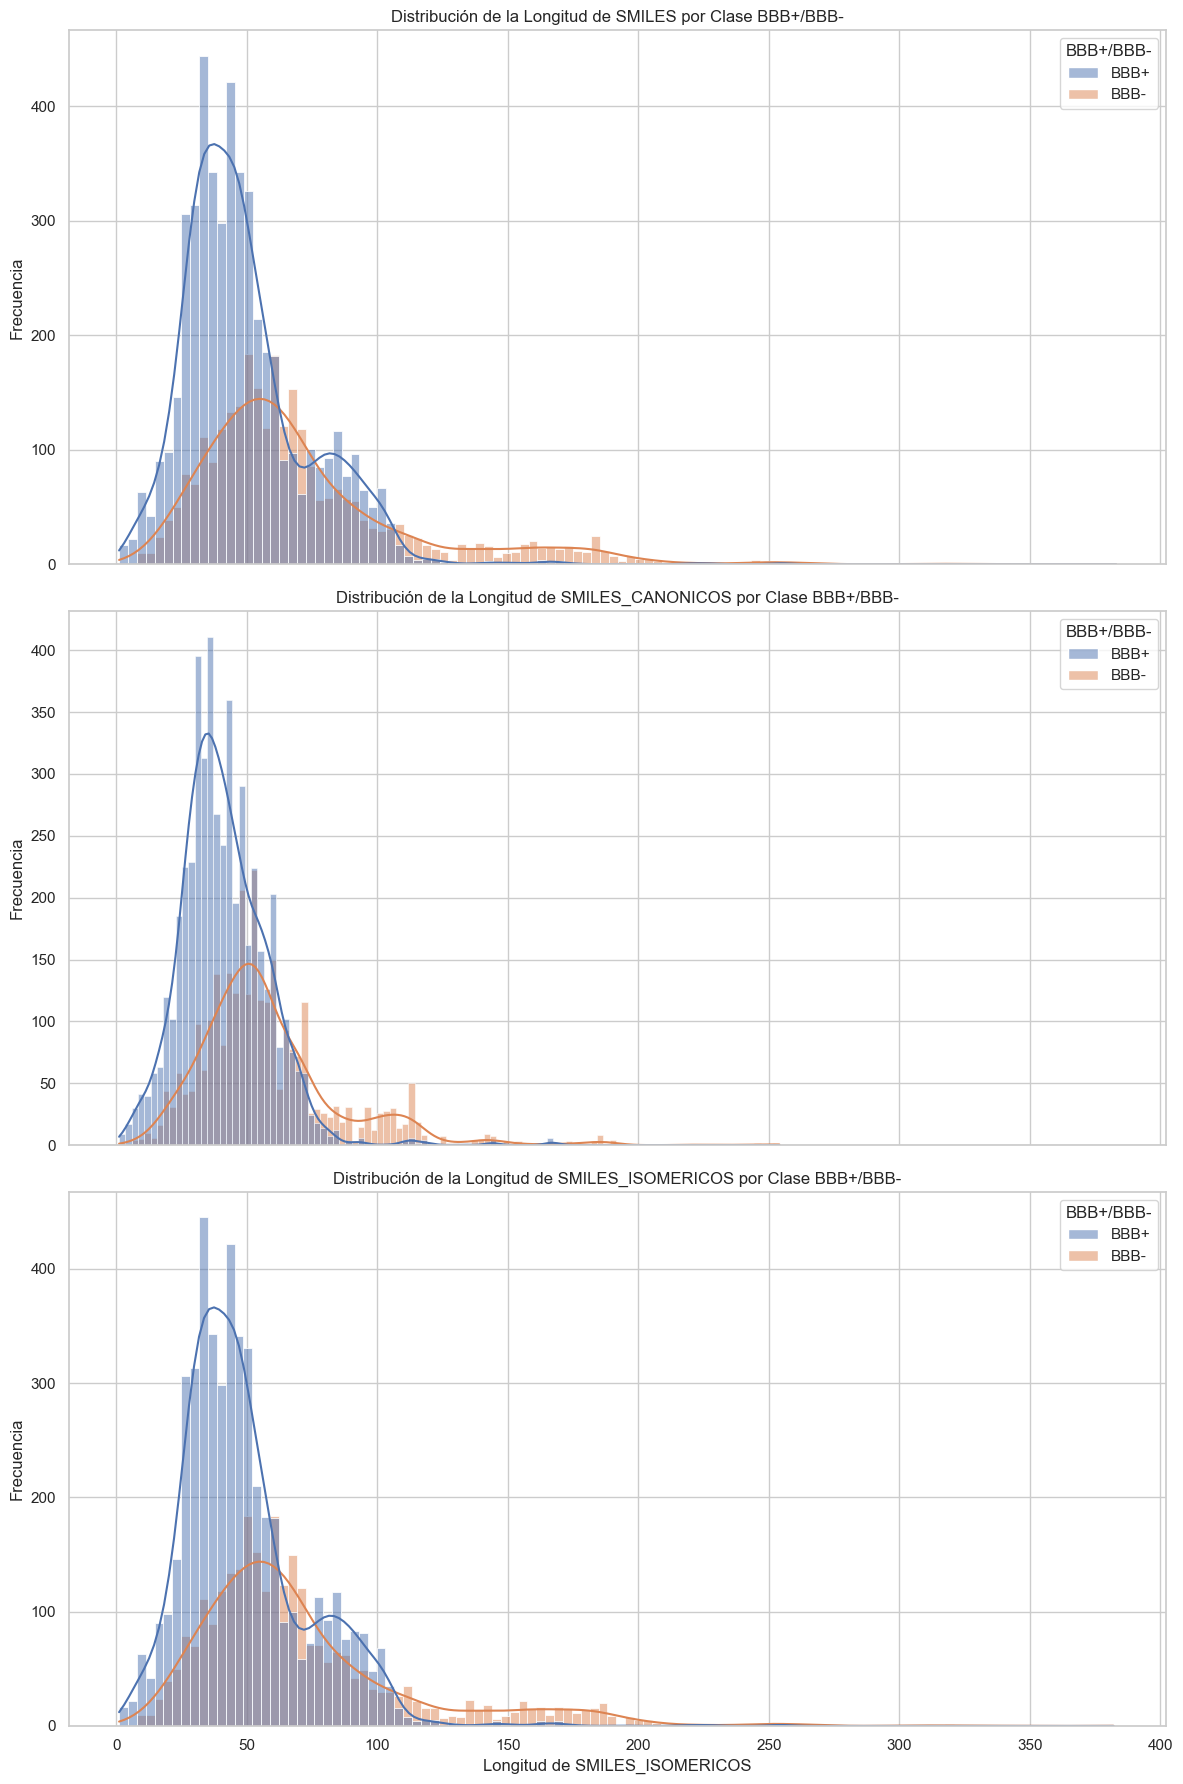

Estadísticas descriptivas para SMILES:
            count       mean        std  min   25%   50%   75%    max
BBB+/BBB-                                                            
BBB+       4956.0  49.213882  24.476819  1.0  33.0  44.0  59.0  256.0
BBB-       2851.0  71.915468  43.547420  4.0  45.0  61.0  85.0  383.0

Estadísticas descriptivas para SMILES_CANONICOS:
            count       mean        std  min   25%   50%   75%    max
BBB+/BBB-                                                            
BBB+       4956.0  41.208838  16.622641  1.0  30.0  39.0  51.0  167.0
BBB-       2851.0  58.224833  28.224134  4.0  41.0  53.0  68.0  254.0

Estadísticas descriptivas para SMILES_ISOMERICOS:
            count       mean        std  min   25%   50%   75%    max
BBB+/BBB-                                                            
BBB+       4956.0  49.211259  24.472047  1.0  33.0  44.0  59.0  256.0
BBB-       2851.0  71.949491  43.568292  4.0  45.0  61.0  85.0  382.0


In [11]:
"""Analisis de Longitud"""

from scipy import stats

# Paso 1: Añadir Columnas de Longitud

# Añadir columnas para la longitud de cada tipo de SMILES
df['SMILES_length'] = df['SMILES'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
df['SMILES_CANONICOS_length'] = df['SMILES_CANONICOS'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
df['SMILES_ISOMERICOS_length'] = df['SMILES_ISOMERICOS'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Paso 2: Visualizar la Distribución de la Longitud

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear un gráfico de distribución para cada tipo de SMILES
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Distribución para SMILES
sns.histplot(data=df, x='SMILES_length', hue='BBB+/BBB-', kde=True, ax=axes[0])
axes[0].set_title("Distribución de la Longitud de SMILES por Clase BBB+/BBB-")
axes[0].set_xlabel("Longitud de SMILES")
axes[0].set_ylabel("Frecuencia")

# Distribución para SMILES_CANONICOS
sns.histplot(data=df, x='SMILES_CANONICOS_length', hue='BBB+/BBB-', kde=True, ax=axes[1])
axes[1].set_title("Distribución de la Longitud de SMILES_CANONICOS por Clase BBB+/BBB-")
axes[1].set_xlabel("Longitud de SMILES_CANONICOS")
axes[1].set_ylabel("Frecuencia")

# Distribución para SMILES_ISOMERICOS
sns.histplot(data=df, x='SMILES_ISOMERICOS_length', hue='BBB+/BBB-', kde=True, ax=axes[2])
axes[2].set_title("Distribución de la Longitud de SMILES_ISOMERICOS por Clase BBB+/BBB-")
axes[2].set_xlabel("Longitud de SMILES_ISOMERICOS")
axes[2].set_ylabel("Frecuencia")

# Ajustar el layout
plt.tight_layout()
plt.show()


from scipy import stats

# Calcular estadísticas descriptivas para SMILES
length_stats_smiles = df.groupby('BBB+/BBB-')['SMILES_length'].describe()
print("Estadísticas descriptivas para SMILES:")
print(length_stats_smiles)

# Calcular estadísticas descriptivas para SMILES_CANONICOS
length_stats_canonicos = df.groupby('BBB+/BBB-')['SMILES_CANONICOS_length'].describe()
print("\nEstadísticas descriptivas para SMILES_CANONICOS:")
print(length_stats_canonicos)

# Calcular estadísticas descriptivas para SMILES_ISOMERICOS
length_stats_isomericos = df.groupby('BBB+/BBB-')['SMILES_ISOMERICOS_length'].describe()
print("\nEstadísticas descriptivas para SMILES_ISOMERICOS:")
print(length_stats_isomericos)



Las estadísticas muestran que las longitudes medias de los SMILES son más largas para las moléculas que atraviesan la barrera hematoencefálica (BBB+), en comparación con las que no la atraviesan (BBB-). Esto es consistente en todas las variantes (SMILES, SMILES_CANONICOS, y SMILES_ISOMERICOS), con una mayor variabilidad en las longitudes para las moléculas BBB+. La gráfica confirma que los SMILES para BBB+ tienden a ser más largos.

Estadísticas descriptivas de simetría:
            count      mean       std  min  25%  50%  75%   max
BBB+/BBB-                                                      
BBB+       4956.0  3.202785  1.543399  0.0  2.0  3.0  4.0   9.0
BBB-       2851.0  3.379867  1.718180  0.0  2.0  3.0  4.0  16.0


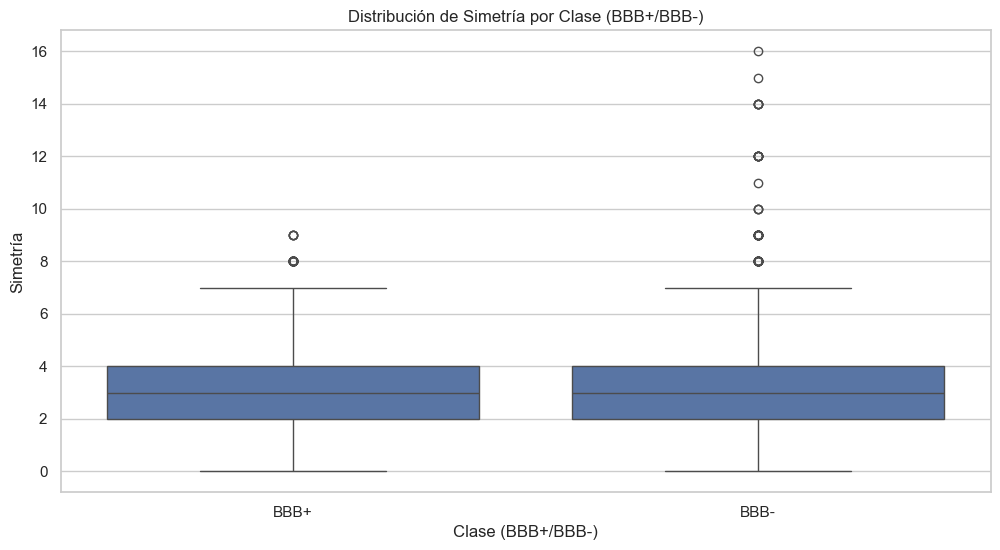

In [12]:
"""Análisis de la Simetría Molecular en Relación con la Permeabilidad a la Barrera Hematoencefálica"""

import pandas as pd  
from rdkit import Chem  
from rdkit.Chem import rdMolDescriptors  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Función para calcular la simetría de una molécula
def calculate_symmetry(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # Calcular la simetría basada en el número de anillos como proxy
        symmetry = rdMolDescriptors.CalcNumRings(mol)
        return symmetry
    return None

# Aplicar la función a cada SMILES
df['Symmetry'] = df['SMILES'].apply(calculate_symmetry)

# Estadísticas descriptivas de simetría
symmetry_stats = df.groupby('BBB+/BBB-')['Symmetry'].describe()

# Mostrar resultados
print("Estadísticas descriptivas de simetría:")
print(symmetry_stats)

# Visualización de la distribución de simetría
plt.figure(figsize=(12, 6))
sns.boxplot(x='BBB+/BBB-', y='Symmetry', data=df)
plt.title('Distribución de Simetría por Clase (BBB+/BBB-)')
plt.xlabel('Clase (BBB+/BBB-)')
plt.ylabel('Simetría')
plt.show()


Las estadísticas descriptivas de simetría muestran que, en promedio, las moléculas que atraviesan la barrera hematoencefálica (BBB+) tienen una simetría de 3.20, mientras que las que no la atraviesan (BBB-) tienen una simetría promedio de 3.38. Ambas clases tienen valores mínimos de 0, con una máxima de 9 para BBB+ y 16 para BBB-. La desviación estándar es similar en ambas clases, indicando una distribución relativamente homogénea en términos de simetría.

Número de moléculas quirales por clase:
BBB+/BBB-
BBB+    3716
BBB-    2363
Name: Is_Chiral, dtype: int64

Porcentaje de moléculas quirales por clase:
BBB+/BBB-
BBB+    74.979822
BBB-    82.883199
dtype: float64


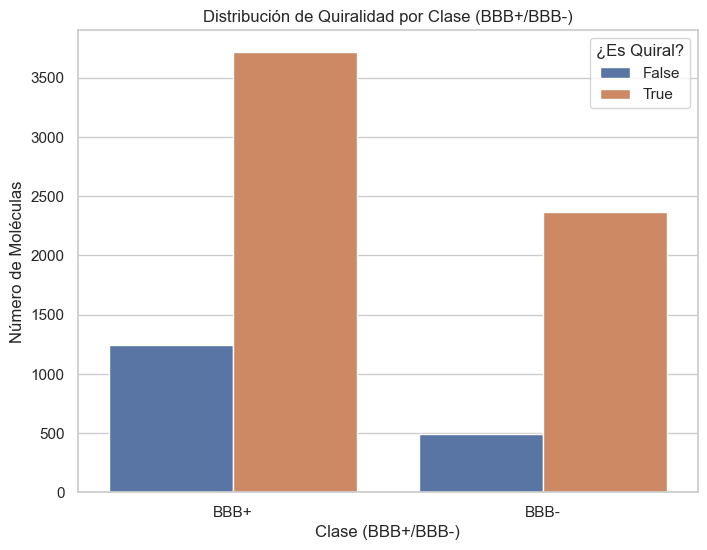

In [13]:
from rdkit import Chem 

# Función para determinar la quiralidad de una molécula
def is_chiral(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return any(atom.HasProp('_ChiralityPossible') for atom in mol.GetAtoms())

# Aplicar la función y crear una columna 'Is_Chiral'
df['Is_Chiral'] = df['SMILES'].apply(is_chiral)

# Contar el número de moléculas quirales por clase
chiral_counts = df.groupby('BBB+/BBB-')['Is_Chiral'].sum()
total_counts = df.groupby('BBB+/BBB-').size()
chiral_percentage = (chiral_counts / total_counts) * 100

print("Número de moléculas quirales por clase:")
print(chiral_counts)
print("\nPorcentaje de moléculas quirales por clase:")
print(chiral_percentage)

# Visualización de la distribución de quiralidad
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

plt.figure(figsize=(8, 6))
sns.countplot(x='BBB+/BBB-', hue='Is_Chiral', data=df)
plt.title('Distribución de Quiralidad por Clase (BBB+/BBB-)')
plt.xlabel('Clase (BBB+/BBB-)')
plt.ylabel('Número de Moléculas')
plt.legend(title='¿Es Quiral?')
plt.show()


En la clase BBB+ hay 3,716 moléculas quirales, representando el 75% del total, mientras que en la clase BBB- hay 2,363, que constituye el 83% del total.

In [15]:
import pandas as pd # type: ignore

# Función para extraer todos los caracteres únicos en los SMILES
def extract_unique_characters(smiles):
    unique_chars = set()
    for smile in smiles:
        unique_chars.update(smile)
    return sorted(unique_chars)

# Extraer caracteres únicos de la columna SMILES
smiles_list = df['SMILES'].dropna()  # Asegúrate de eliminar valores nulos si los hay
unique_characters = extract_unique_characters(smiles_list)

# Imprimir el listado de caracteres únicos
print("Listado de caracteres únicos en los SMILES:")
for char in unique_characters:
    print(char)


Listado de caracteres únicos en los SMILES:
#
(
)
+
-
.
/
1
2
3
4
5
6
7
8
9
=
@
A
B
C
F
H
I
K
L
N
O
P
S
X
[
\
]
c
e
i
l
n
o
r
s


In [16]:
import pandas as pd
from collections import Counter

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_path, low_memory=False)

# Concatenar todos los SMILES en una sola cadena
all_smiles = ' '.join(df['SMILES'].dropna())

# Contar combinaciones de 2 y 3 caracteres
def count_combinations(text, n):
    return Counter(text[i:i+n] for i in range(len(text) - n + 1))

# Contar combinaciones de 2 y 3 caracteres
bigram_counts = count_combinations(all_smiles, 2)
trigram_counts = count_combinations(all_smiles, 3)

# Mostrar las combinaciones más comunes
print("Combinaciones de 2 caracteres más comunes:")
for combo, count in bigram_counts.most_common(20):
    print(f'{combo}: {count}')

print("\nCombinaciones de 3 caracteres más comunes:")
for combo, count in trigram_counts.most_common(20):
    print(f'{combo}: {count}')


Combinaciones de 2 caracteres más comunes:
cc: 25313
CC: 22334
O): 19939
C(: 18266
[C: 17889
C@: 17882
(C: 15626
H]: 15277
@H: 14741
)C: 14695
=O: 12820
(=: 11556
C): 10908
@@: 8696
c1: 8379
)c: 7979
](: 7632
(O: 7538
c(: 6991
)[: 6660

Combinaciones de 3 caracteres más comunes:
[C@: 17882
@H]: 14741
ccc: 14288
=O): 12285
(=O: 11237
C(=: 10122
C@@: 8685
(C): 8353
C@H: 7844
H](: 7017
@@H: 6897
O)C: 6824
CCC: 6445
)[C: 6381
C[C: 5847
(O): 5532
CC(: 4565
C(C: 4549
C)C: 4437
c1c: 4100


In [17]:
import pandas as pd
from collections import Counter

# Concatenar todos los SMILES en una sola cadena
all_smiles = ' '.join(df['SMILES'].dropna())

# Contar combinaciones de 2 y 3 caracteres
def count_combinations(text, n):
    return Counter(text[i:i+n] for i in range(len(text) - n + 1))

# Contar combinaciones de 2 y 3 caracteres
bigram_counts = count_combinations(all_smiles, 2)
trigram_counts = count_combinations(all_smiles, 3)

# Buscar combinaciones específicas
def search_combinations(counter, queries):
    return {query: counter.get(query, 0) for query in queries}

# Combinaciones específicas a buscar
specific_combinations = ['Br', 'Cl', 'F', 'I', 'N+', 'OH']

# Mostrar las combinaciones más comunes
print("Combinaciones de 2 caracteres más comunes:")
for combo, count in bigram_counts.most_common(20):
    print(f'{combo}: {count}')

print("\nCombinaciones de 3 caracteres más comunes:")
for combo, count in trigram_counts.most_common(20):
    print(f'{combo}: {count}')

# Mostrar conteo de combinaciones específicas
print("\nConteo de combinaciones específicas:")
specific_counts = search_combinations(bigram_counts, specific_combinations)
for combo, count in specific_counts.items():
    print(f'{combo}: {count}')


Combinaciones de 2 caracteres más comunes:
cc: 25313
CC: 22334
O): 19939
C(: 18266
[C: 17889
C@: 17882
(C: 15626
H]: 15277
@H: 14741
)C: 14695
=O: 12820
(=: 11556
C): 10908
@@: 8696
c1: 8379
)c: 7979
](: 7632
(O: 7538
c(: 6991
)[: 6660

Combinaciones de 3 caracteres más comunes:
[C@: 17882
@H]: 14741
ccc: 14288
=O): 12285
(=O: 11237
C(=: 10122
C@@: 8685
(C): 8353
C@H: 7844
H](: 7017
@@H: 6897
O)C: 6824
CCC: 6445
)[C: 6381
C[C: 5847
(O): 5532
CC(: 4565
C(C: 4549
C)C: 4437
c1c: 4100

Conteo de combinaciones específicas:
Br: 160
Cl: 1823
F: 0
I: 0
N+: 278
OH: 0


   Character  Frequency
2          C     103574
5          c      53347
3          (      42477
4          )      42477
12         O      31015


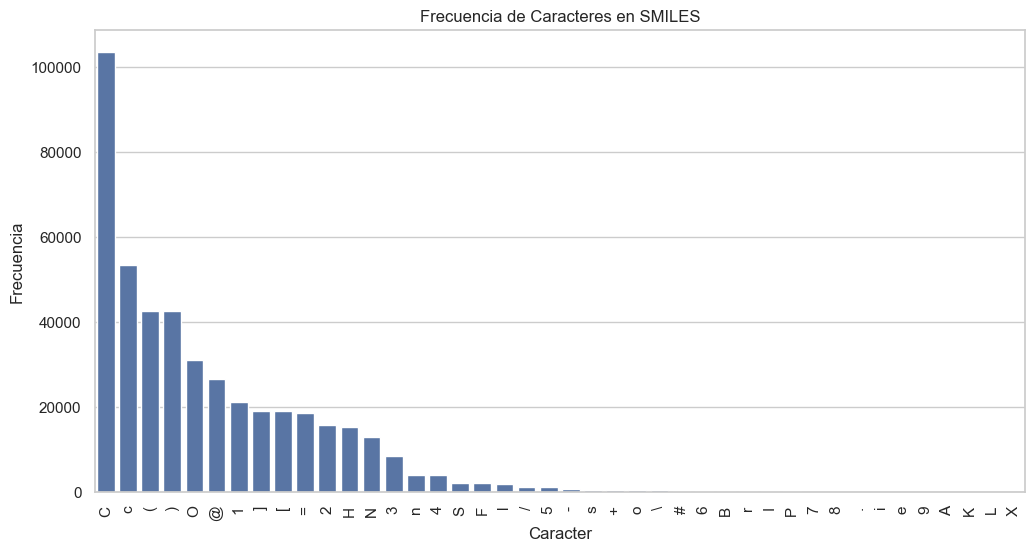

In [14]:
import pandas as pd  # type: ignore
from collections import Counter
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore

# Concatenar todos los SMILES en una sola cadena
all_smiles = ''.join(df['SMILES'].dropna())

# Contar la frecuencia de cada carácter
char_freq = Counter(all_smiles)

# Convertir el Counter a DataFrame para visualización
char_freq_df = pd.DataFrame.from_dict(char_freq, orient='index').reset_index()
char_freq_df.columns = ['Character', 'Frequency']

# Ordenar por frecuencia
char_freq_df = char_freq_df.sort_values(by='Frequency', ascending=False)

# Mostrar las primeras filas del DataFrame
print(char_freq_df.head())

# Visualizar las frecuencias de los caracteres
plt.figure(figsize=(12, 6))
sns.barplot(x='Character', y='Frequency', data=char_freq_df)
plt.title('Frecuencia de Caracteres en SMILES')
plt.xlabel('Caracter')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()



Categoría: BBB+
Frecuencia de Caracteres:

Más comunes:
C: 59894
c: 33537
(: 20680
): 20680
O: 14041
@: 13801
1: 13470
[: 9870
]: 9870
2: 9510

Menos comunes:
X: 1
i: 1
L: 1
K: 1
A: 1
e: 2
.: 3
I: 18
P: 19
6: 52

Categoría: BBB-
Frecuencia de Caracteres:

Más comunes:
C: 43680
(: 21797
): 21797
c: 19810
O: 16974
@: 12795
=: 9301
[: 9156
]: 9156
H: 8173

Menos comunes:
i: 1
9: 2
.: 8
8: 20
r: 32
B: 32
7: 38
P: 47
I: 66
#: 108


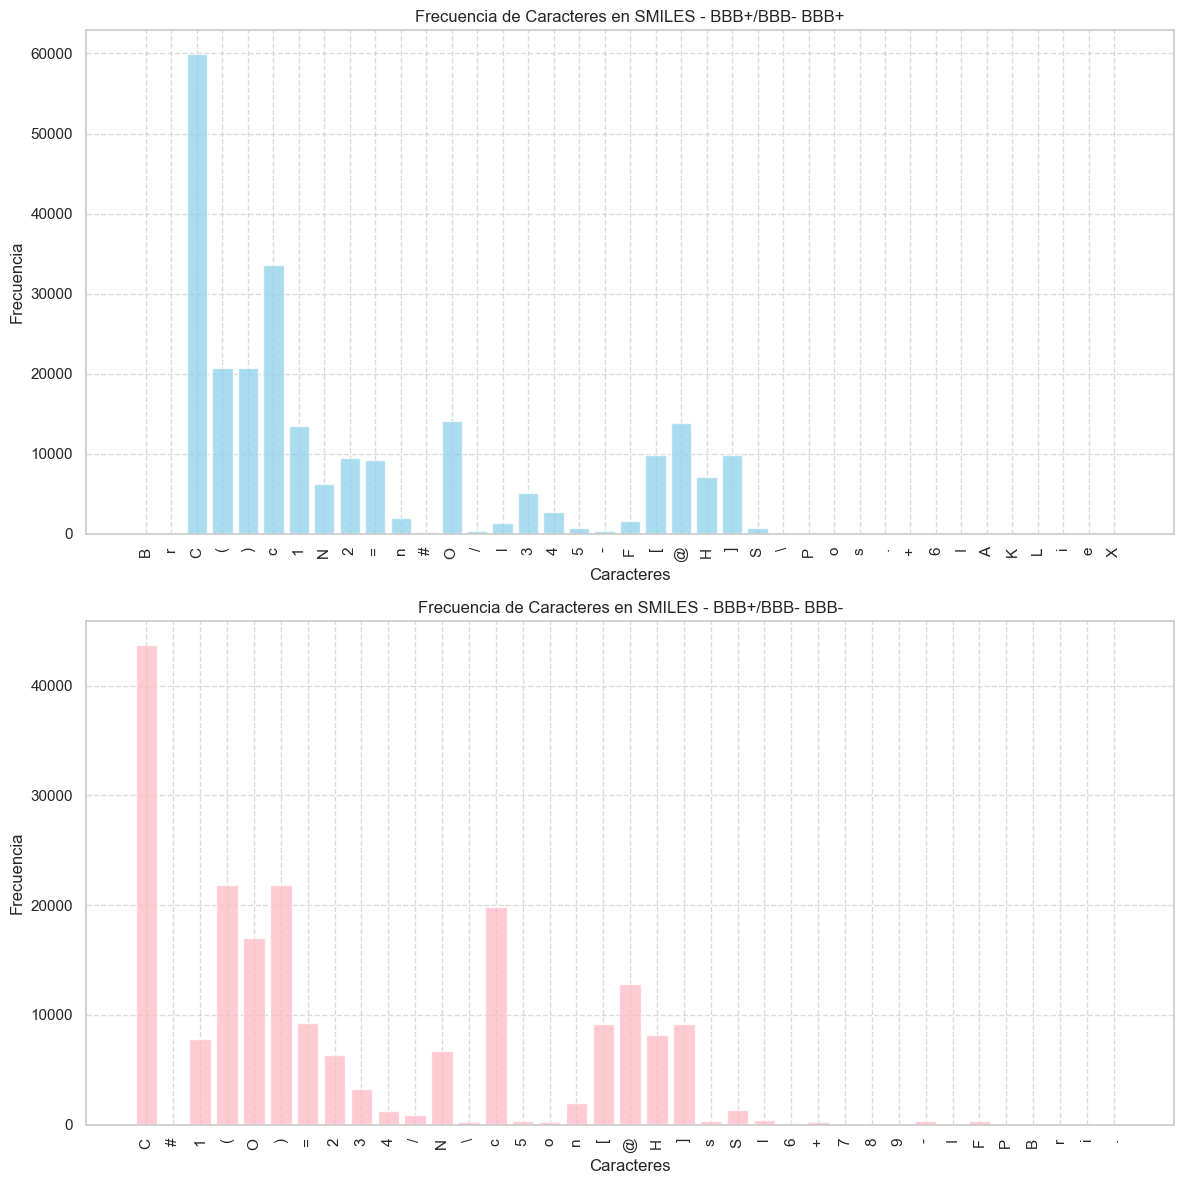

In [24]:
import pandas as pd # type: ignore
from collections import Counter # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Verificar que df contenga las columnas necesarias
if 'SMILES' not in df.columns or 'BBB+/BBB-' not in df.columns:
    raise ValueError("El DataFrame no contiene las columnas 'SMILES' o 'BBB+/BBB-'")

# Función para calcular la frecuencia de caracteres
def calculate_char_frequency(df):
    all_chars = ''.join(df['SMILES'])
    return Counter(all_chars)

# Función para generar el informe textual
def generate_report(counter, top_n=10):
    most_common = counter.most_common(top_n)
    least_common = counter.most_common()[:-top_n-1:-1]
    
    print("Frecuencia de Caracteres:")
    print("\nMás comunes:")
    for char, count in most_common:
        print(f'{char}: {count}')
    
    print("\nMenos comunes:")
    for char, count in least_common:
        print(f'{char}: {count}')
    
    return most_common, least_common

# Preparar la visualización
plt.figure(figsize=(12, 12))

# Obtener las categorías de BBB+/BBB-
categories = df['BBB+/BBB-'].unique()
colors = ['skyblue', 'lightpink']  # Colores para las diferentes categorías

# Crear un gráfico para cada categoría
for i, (label, color) in enumerate(zip(categories, colors), start=1):
    plt.subplot(len(categories), 1, i)  # Crear un subplot por categoría
    subset = df[df['BBB+/BBB-'] == label]
    char_count = calculate_char_frequency(subset)
    
    # Generar informe textual para la categoría
    print(f"\nCategoría: {label}")
    generate_report(char_count)
    
    # Visualización
    plt.bar(char_count.keys(), char_count.values(), alpha=0.7, color=color)
    plt.xlabel('Caracteres')
    plt.ylabel('Frecuencia')
    plt.title(f'Frecuencia de Caracteres en SMILES - BBB+/BBB- {label}')
    plt.xticks(rotation=90)
    plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()


En la categoría BBB+, los caracteres más frecuentes son C (carbono), c (carbono aromático), ( y ) (delimitadores de anillos), y O (oxígeno), indicando la alta presencia de estos elementos en las moléculas. Los menos comunes, como X y i, no tienen significados estándar universales en SMILES pero pueden representar átomos o estructuras específicas. En BBB-, i y 9 son raros; i puede marcar posiciones en anillos, y 9 podría estar relacionado con numeraciones específicas en estructuras personalizadas.

Estadísticas descriptivas de polaridad:
            count      mean       std     min     25%     50%     75%      max
BBB+/BBB-                                                                     
BBB+       4956.0  2.874041  1.578878 -4.3754  1.8437  2.9233  3.9625  10.0563
BBB-       2851.0  1.455545  2.755004 -8.8953  0.0013  1.4582  3.1111  12.6058


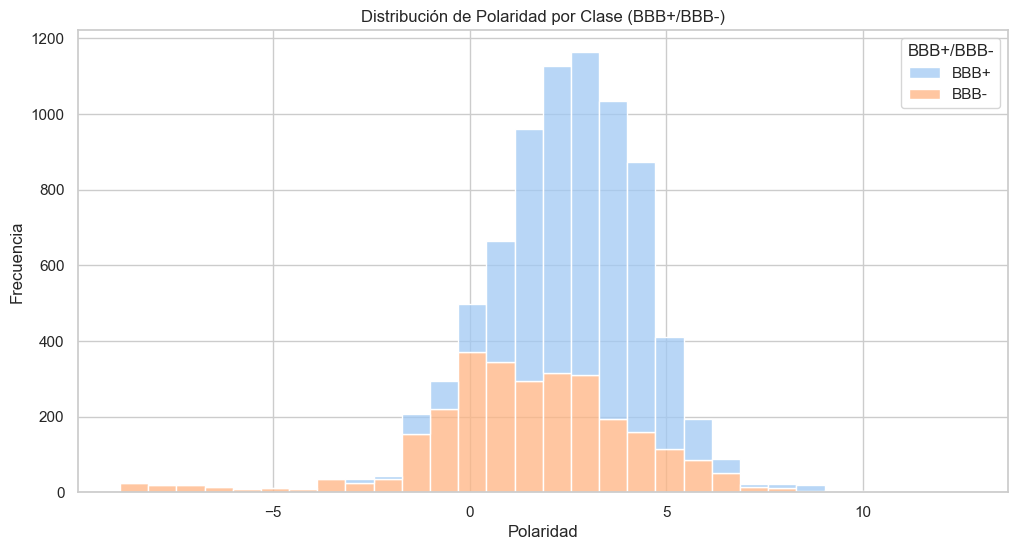

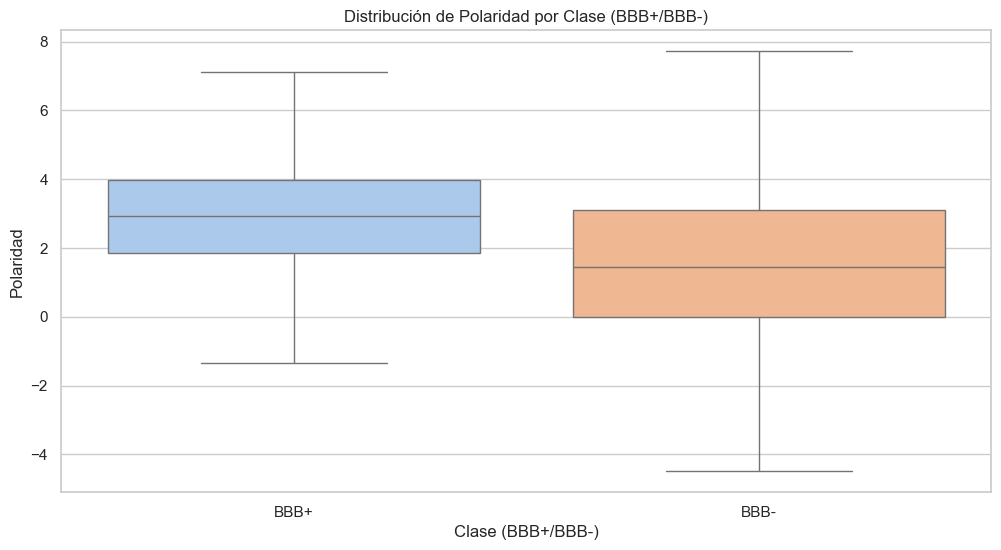

In [29]:
import pandas as pd # type: ignore
from rdkit import Chem # type: ignore
from rdkit.Chem import Descriptors # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Verificar que df contenga las columnas necesarias
if 'SMILES' not in df.columns or 'BBB+/BBB-' not in df.columns:
    raise ValueError("El DataFrame no contiene las columnas 'SMILES' o 'BBB+/BBB-'")

# Función para calcular la polaridad (momento dipolar) de una molécula
def calculate_polarity(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.MolLogP(mol)  # Aquí usamos el LogP como proxy de polaridad
    return None

# Aplicar la función a cada SMILES
df['Polarity'] = df['SMILES'].apply(calculate_polarity)

# Estadísticas descriptivas de polaridad
polar_stats = df.groupby('BBB+/BBB-')['Polarity'].describe()

# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas de polaridad:")
print(polar_stats)

# Visualización de la distribución de polaridad
plt.figure(figsize=(12, 6))

# Histogramas de polaridad por clase
sns.histplot(data=df, x='Polarity', hue='BBB+/BBB-', multiple='stack', palette='pastel', bins=30)
plt.title('Distribución de Polaridad por Clase (BBB+/BBB-)')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))

# Boxplot de polaridad por clase
sns.boxplot(x='BBB+/BBB-', y='Polarity', data=df, palette='pastel', hue='BBB+/BBB-', showfliers=False)
plt.title('Distribución de Polaridad por Clase (BBB+/BBB-)')
plt.xlabel('Clase (BBB+/BBB-)')
plt.ylabel('Polaridad')
plt.show()

# Análisis de Polaridad:

# Para la categoría BBB+, la polaridad media es 2.87 con una desviación estándar de 1.58. 
# La polaridad varía desde un mínimo de -4.38 hasta un máximo de 10.06, con el 25% de los valores por debajo de 1.84 
# y el 75% por debajo de 3.96.

# En contraste, para BBB-, la polaridad media es 1.46 con una desviación estándar de 2.76. Los valores van desde -8.90 
# hasta 12.61, con el 25% de los valores por debajo de 0.00 y el 75% por debajo de 3.11.

# Conclusiones: Las moléculas en la categoría BBB+ tienden a tener una mayor polaridad media y menor variabilidad en comparación 
# con las de BBB-. La gama de polaridad es más amplia en BBB-, lo que sugiere una mayor diversidad en las propiedades de polaridad 
# de estas moléculas.


Análisis de Polaridad:


"""
Para la categoría BBB+, la polaridad media es 2.87 con una desviación estándar de 1.58. 
La polaridad varía desde un mínimo de -4.38 hasta un máximo de 10.06, con el 25% de los valores por debajo de 1.84 
y el 75% por debajo de 3.96.

En contraste, para BBB-, la polaridad media es 1.46 con una desviación estándar de 2.76. Los valores van desde -8.90 
hasta 12.61, con el 25% de los valores por debajo de 0.00 y el 75% por debajo de 3.11.

Conclusiones: Las moléculas en la categoría BBB+ tienden a tener una mayor polaridad media y menor variabilidad en comparación 
con las de BBB-. La gama de polaridad es más amplia en BBB-, lo que sugiere una mayor diversidad en las propiedades de polaridad 
de estas moléculas.
"""

{'_GasteigerCharge', '__computedProps', 'isImplicit', '_GasteigerHCharge'}
Estadísticas descriptivas de cargas explícitas:
              count      mean       std       min       25%       50%  \
BBB+/BBB-                                                               
BBB+       233634.0  0.000094  0.130554 -0.754605 -0.031386  0.028042   
BBB-       173470.0  0.000686  0.162931 -0.739367 -0.035873  0.032403   

                75%       max  
BBB+/BBB-                      
BBB+       0.061877  0.572607  
BBB-       0.066951  0.554222  


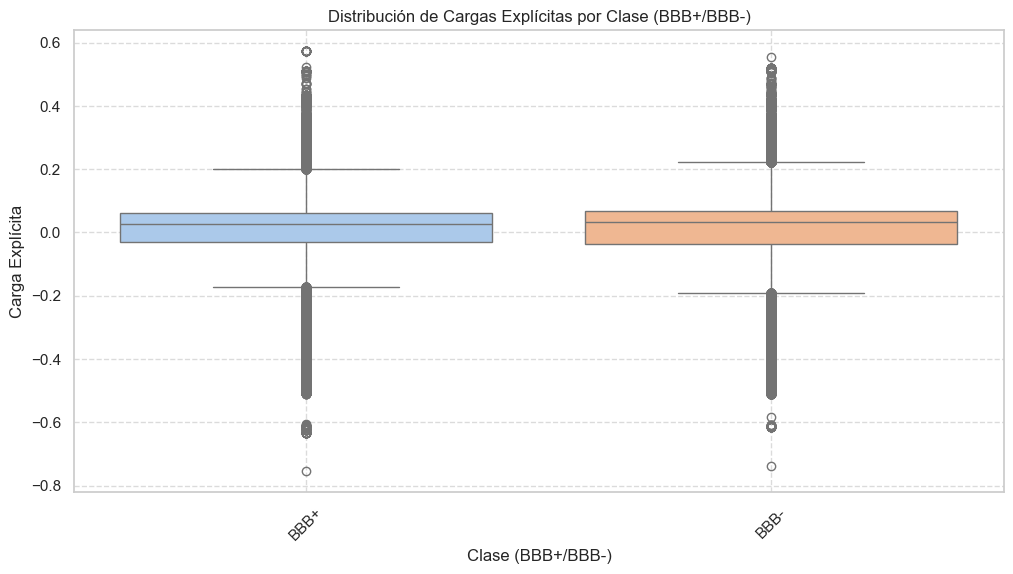

In [36]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

# Función para calcular las cargas explícitas usando el modelo de Gasteiger
def calculate_explicit_charges(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # Añadir hidrógenos para obtener cargas correctas
        mol = Chem.AddHs(mol)
        AllChem.ComputeGasteigerCharges(mol)  # Calcular cargas Gasteiger
        charges = []
        for atom in mol.GetAtoms():
            charge = atom.GetProp('_GasteigerCharge')
            charges.append(float(charge))  # Convertir a tipo float
        return charges
    return []

# Aplicar la función a cada SMILES
df['ExplicitCharges'] = df['SMILES'].apply(calculate_explicit_charges)


def check_atom_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mol = Chem.AddHs(mol)
        AllChem.ComputeGasteigerCharges(mol)
        properties = set()
        for atom in mol.GetAtoms():
            properties.update(atom.GetPropsAsDict().keys())
        return properties
    return set()

# Comprobar propiedades para un SMILES de ejemplo
sample_smiles = df['SMILES'].iloc[0]
print(check_atom_properties(sample_smiles))

import matplotlib.pyplot as plt
import seaborn as sns

# Expandir la lista de cargas explícitas en un formato que permita el análisis
df_expanded = df.copy()
df_expanded = df_expanded.explode('ExplicitCharges')  # Expandir la lista de cargas

# Convertir las cargas a tipo numérico
df_expanded['ExplicitCharges'] = pd.to_numeric(df_expanded['ExplicitCharges'], errors='coerce')

# Estadísticas descriptivas de cargas explícitas por categoría
charge_stats = df_expanded.groupby('BBB+/BBB-')['ExplicitCharges'].describe()

# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas de cargas explícitas:")
print(charge_stats)

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Visualización de la distribución de cargas explícitas por categoría
plt.figure(figsize=(12, 6))
sns.boxplot(x='BBB+/BBB-', y='ExplicitCharges', data=df_expanded, palette='pastel', hue='BBB+/BBB-')
plt.title('Distribución de Cargas Explícitas por Clase (BBB+/BBB-)')
plt.xlabel('Clase (BBB+/BBB-)')
plt.ylabel('Carga Explícita')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()



Estadísticas Descriptivas de Cargas Explícitas
Estadísticas Descriptivas:

Para las cargas explícitas en las categorías BBB+ y BBB-:

BBB+: La carga media es de 0.000094 con una desviación estándar de 0.130554. Las cargas varían entre -0.754605 y 0.572607, con el 25% de los valores por debajo de -0.031386 y el 75% por debajo de 0.061877.

BBB-: La carga media es de 0.000686 con una desviación estándar de 0.162931. Las cargas van desde -0.739367 hasta 0.554222, con el 25% de los valores por debajo de -0.035873 y el 75% por debajo de 0.066951.

Conclusiones:

Las cargas explícitas en ambas categorías tienen una media muy cercana a cero, pero BBB- muestra una mayor desviación estándar, indicando una mayor variabilidad en las cargas. Las distribuciones de cargas son relativamente similares entre las dos categorías, aunque BBB- tiene un rango ligeramente más amplio.

Estadísticas Descriptivas de Enlaces Dobles:
            count      mean       std  min  25%  50%  75%   max
BBB+/BBB-                                                      
BBB+       4956.0  1.862389  1.751237  0.0  1.0  1.0  3.0  12.0
BBB-       2851.0  3.262364  2.469161  0.0  1.0  3.0  5.0  16.0


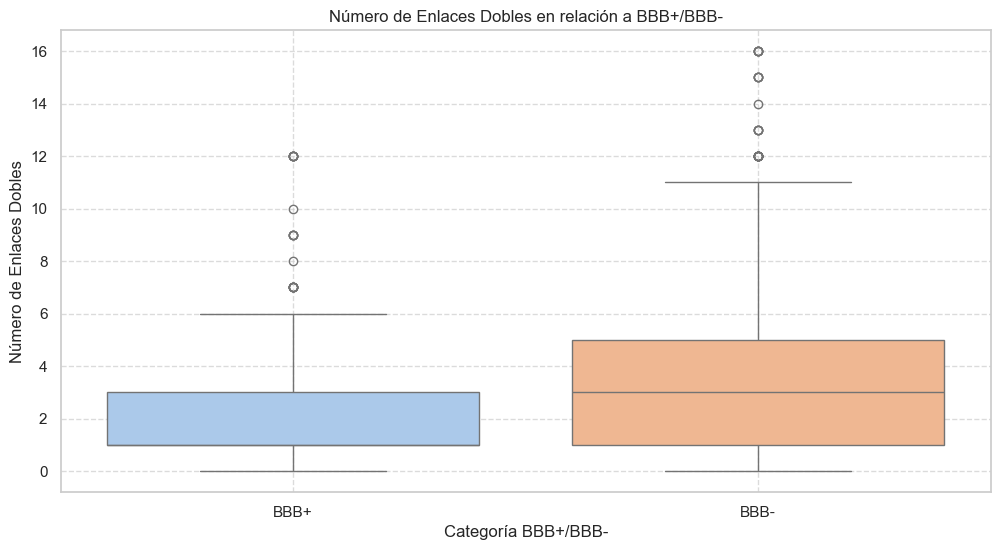

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem

# Verificar que df contenga las columnas necesarias
if 'SMILES' not in df.columns or 'BBB+/BBB-' not in df.columns:
    raise ValueError("El DataFrame no contiene las columnas 'SMILES' o 'BBB+/BBB-'")

# Función para contar enlaces dobles en un SMILES
def count_double_bonds(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        num_double_bonds = len([bond for bond in mol.GetBonds() if bond.GetBondTypeAsDouble() == 2.0])
        return num_double_bonds
    return None

# Calcular el número de enlaces dobles
df['DoubleBonds'] = df['SMILES'].apply(count_double_bonds)

# Estadísticas descriptivas de enlaces dobles
print("Estadísticas Descriptivas de Enlaces Dobles:")
print(df.groupby('BBB+/BBB-')['DoubleBonds'].describe())

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Usar `hue` para asignar colores a las categorías y ajustar la leyenda
sns.boxplot(x='BBB+/BBB-', y='DoubleBonds', data=df, hue='BBB+/BBB-', palette='pastel')

# Configuración de etiquetas y título
plt.xlabel('Categoría BBB+/BBB-')
plt.ylabel('Número de Enlaces Dobles')
plt.title('Número de Enlaces Dobles en relación a BBB+/BBB-')
plt.grid(True, linestyle='--', alpha=0.7)


# Mostrar el gráfico
plt.show()


Análisis de Enlaces Dobles
Estadísticas Descriptivas:

Para la categoría BBB+, el número medio de enlaces dobles es 1.86, con una desviación estándar de 1.75. Los valores varían desde un mínimo de 0 hasta un máximo de 12. El 25% de las moléculas tienen 1 enlace doble o menos, y el 75% tienen hasta 3 enlaces dobles.

En contraste, para BBB-, la media de enlaces dobles es significativamente mayor, 3.26, con una desviación estándar de 2.47. Los valores oscilan entre 0 y 16. El 25% de las moléculas tienen hasta 1 enlace doble, mientras que el 75% tienen hasta 5 enlaces dobles.

Conclusiones:

Las moléculas en la categoría BBB- tienden a tener más enlaces dobles en comparación con las de BBB+. La variabilidad en el número de enlaces dobles es también mayor en BBB-, lo que indica una mayor diversidad en la estructura de las moléculas de esta categoría. En comparación, las moléculas en BBB+ muestran una distribución más concentrada en torno a un menor número de enlaces dobles, sugiriendo menos diversidad en sus estructuras en este aspecto.

Esta diferencia podría implicar que la presencia de enlaces dobles tiene un efecto sobre la capacidad de las moléculas para atravesar la barrera hematoencefálica, lo que puede ser relevante para la predicción de sus propiedades.



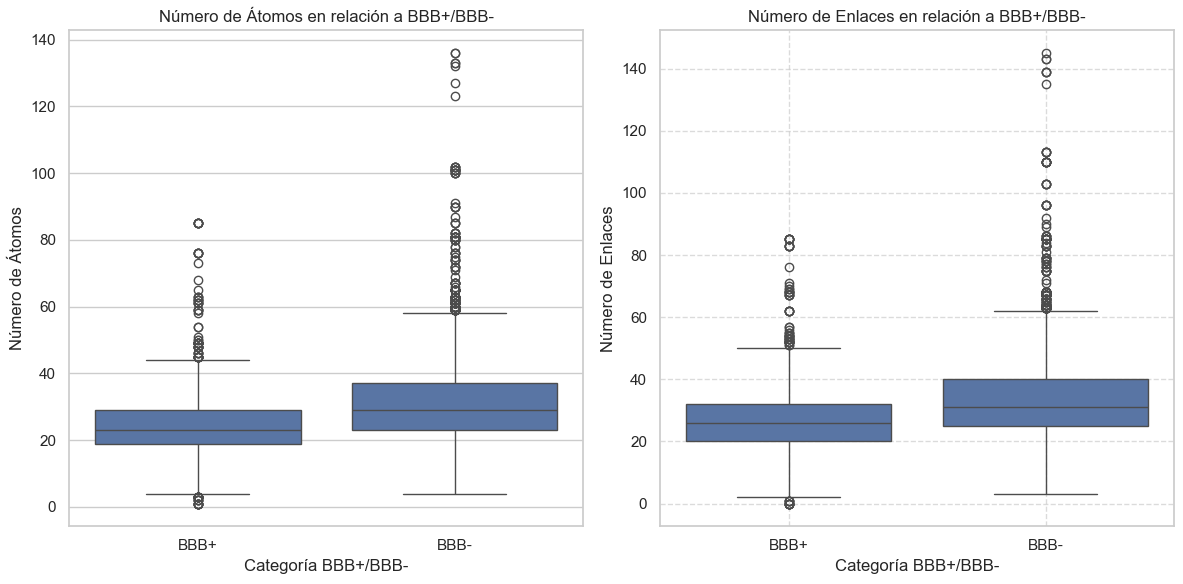

Estadísticas Descriptivas para el Número de Átomos:
            count       mean        std  min   25%   50%   75%    max
BBB+/BBB-                                                            
BBB+       4956.0  23.908797   8.542891  1.0  19.0  23.0  29.0   85.0
BBB-       2851.0  32.101017  15.037858  4.0  23.0  29.0  37.0  136.0

Estadísticas Descriptivas para el Número de Enlaces:
            count       mean        std  min   25%   50%   75%    max
BBB+/BBB-                                                            
BBB+       4956.0  26.087974   9.677104  0.0  20.0  26.0  32.0   85.0
BBB-       2851.0  34.445808  16.199051  3.0  25.0  31.0  40.0  145.0


In [44]:
# Función para contar átomos y enlaces en un SMILES
def count_atoms_and_bonds(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        num_atoms = mol.GetNumAtoms()
        num_bonds = mol.GetNumBonds()
        return num_atoms, num_bonds
    return None, None

# Aplicar la función y crear nuevas columnas en el DataFrame
df[['NumAtoms', 'NumBonds']] = df['SMILES'].apply(lambda smiles: pd.Series(count_atoms_and_bonds(smiles)))

# Visualización de la relación entre el número de átomos/enlaces y BBB+/BBB-

plt.figure(figsize=(12, 6))

# Número de Átomos
plt.subplot(1, 2, 1)
sns.boxplot(x='BBB+/BBB-', y='NumAtoms', data=df)
plt.xlabel('Categoría BBB+/BBB-')
plt.ylabel('Número de Átomos')
plt.title('Número de Átomos en relación a BBB+/BBB-')

# Número de Enlaces
plt.subplot(1, 2, 2)
sns.boxplot(x='BBB+/BBB-', y='NumBonds', data=df)
plt.xlabel('Categoría BBB+/BBB-')
plt.ylabel('Número de Enlaces')
plt.title('Número de Enlaces en relación a BBB+/BBB-')

plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Estadísticas descriptivas para el número de átomos
stats_atoms = df.groupby('BBB+/BBB-')['NumAtoms'].describe()

# Estadísticas descriptivas para el número de enlaces
stats_bonds = df.groupby('BBB+/BBB-')['NumBonds'].describe()

print("Estadísticas Descriptivas para el Número de Átomos:")
print(stats_atoms)
print("\nEstadísticas Descriptivas para el Número de Enlaces:")
print(stats_bonds)

Las moléculas que no atraviesan la barrera hematoencefálica (BBB-) presentan en promedio más átomos (32.10) y enlaces (34.45) en comparación con las que sí la atraviesan (BBB+) (23.91 átomos y 26.09 enlaces). Además, la mayor desviación estándar en el grupo BBB- indica una mayor variabilidad en tamaño y complejidad. Estos hallazgos sugieren que las moléculas más grandes y complejas tienden a no atravesar la barrera. Considerar estas diferencias puede ser crucial para mejorar modelos predictivos sobre la permeabilidad de las moléculas a través de la barrera hematoencefálica. Explorar otros descriptores moleculares también podría ofrecer más información para optimizar las predicciones.

In [46]:
# Función para contar el número de anillos en un SMILES
def ring_count(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        ring_info = mol.GetRingInfo()
        return len(ring_info.AtomRings())
    return None

# Aplicar la función y crear una nueva columna en el DataFrame
df['RingCount'] = df['SMILES'].apply(ring_count)

# Agrupar por BBB+/BBB- y calcular estadísticas básicas
ring_count_stats = df.groupby('BBB+/BBB-')['RingCount'].describe()
print("\nEstadísticas de Número de Anillos:")
print(ring_count_stats)



Estadísticas de Número de Anillos:
            count      mean       std  min  25%  50%  75%   max
BBB+/BBB-                                                      
BBB+       4956.0  3.202785  1.543399  0.0  2.0  3.0  4.0   9.0
BBB-       2851.0  3.379867  1.718180  0.0  2.0  3.0  4.0  16.0


Las estadísticas del número de anillos revelan que las moléculas en la categoría BBB+ tienen un promedio de 3.20 anillos con una desviación estándar de 1.54. En comparación, las moléculas en la categoría BBB- presentan un promedio ligeramente mayor de 3.38 anillos y una desviación estándar de 1.72. Ambos grupos tienen un rango similar en el número de anillos, con valores mínimos de 0 y máximos de 9 para BBB+ y 16 para BBB-. La distribución muestra que las moléculas en ambas categorías tienden a tener entre 2 y 4 anillos en la mayoría de los casos, pero las moléculas BBB- presentan una mayor variabilidad en el número máximo de anillos.

In [47]:

# Función para contar átomos y enlaces en un SMILES
def count_atoms_and_bonds(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        num_atoms = mol.GetNumAtoms()
        num_bonds = mol.GetNumBonds()
        return num_atoms, num_bonds
    return None, None

# Aplicar la función y crear nuevas columnas en el DataFrame
df[['NumAtoms', 'NumBonds']] = df['SMILES'].apply(lambda smiles: pd.Series(count_atoms_and_bonds(smiles)))

# Agrupar por BBB+/BBB- y calcular estadísticas básicas
atoms_bonds_stats = df.groupby('BBB+/BBB-')[['NumAtoms', 'NumBonds']].describe().transpose()
print("Estadísticas de Número de Átomos y Enlaces:")
print(atoms_bonds_stats)

# Función para calcular el grado de conectividad promedio
def average_connectivity(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        degrees = [atom.GetDegree() for atom in mol.GetAtoms()]
        return sum(degrees) / len(degrees) if degrees else None
    return None

# Aplicar la función y crear una nueva columna en el DataFrame
df['AvgConnectivity'] = df['SMILES'].apply(average_connectivity)

# Agrupar por BBB+/BBB- y calcular estadísticas básicas
connectivity_stats = df.groupby('BBB+/BBB-')['AvgConnectivity'].describe()
print("\nEstadísticas de Conectividad Promedio:")
print(connectivity_stats)

# Función para calcular el número de anillos en un SMILES
def ring_count(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        ring_info = mol.GetRingInfo()
        return len(ring_info.AtomRings())
    return None

# Aplicar la función y crear una nueva columna en el DataFrame
df['RingCount'] = df['SMILES'].apply(ring_count)

# Agrupar por BBB+/BBB- y calcular estadísticas básicas
ring_count_stats = df.groupby('BBB+/BBB-')['RingCount'].describe()
print("\nEstadísticas de Número de Anillos:")
print(ring_count_stats)

# Función para contar el número de enlaces rotacionales en un SMILES
def rotatable_bond_count(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.NumRotatableBonds(mol)  # type: ignore
    return None

# Aplicar la función y crear una nueva columna en el DataFrame
df['RotatableBonds'] = df['SMILES'].apply(rotatable_bond_count)

# Agrupar por BBB+/BBB- y calcular estadísticas básicas
rotatable_bond_stats = df.groupby('BBB+/BBB-')['RotatableBonds'].describe()
print("\nEstadísticas de Enlaces Rotacionales:")
print(rotatable_bond_stats)

# Función para contar el número de enlaces múltiples en un SMILES
def multiple_bonds_count(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return sum(1 for bond in mol.GetBonds() if bond.GetBondTypeAsDouble() > 1.0)
    return None

# Aplicar la función y crear una nueva columna en el DataFrame
df['MultipleBonds'] = df['SMILES'].apply(multiple_bonds_count)

# Agrupar por BBB+/BBB- y calcular estadísticas básicas
multiple_bonds_stats = df.groupby('BBB+/BBB-')['MultipleBonds'].describe()
print("\nEstadísticas de Enlaces Múltiples:")
print(multiple_bonds_stats)


Estadísticas de Número de Átomos y Enlaces:
BBB+/BBB-              BBB+         BBB-
NumAtoms count  4956.000000  2851.000000
         mean     23.908797    32.101017
         std       8.542891    15.037858
         min       1.000000     4.000000
         25%      19.000000    23.000000
         50%      23.000000    29.000000
         75%      29.000000    37.000000
         max      85.000000   136.000000
NumBonds count  4956.000000  2851.000000
         mean     26.087974    34.445808
         std       9.677104    16.199051
         min       0.000000     3.000000
         25%      20.000000    25.000000
         50%      26.000000    31.000000
         75%      32.000000    40.000000
         max      85.000000   145.000000

Estadísticas de Conectividad Promedio:
            count      mean       std  min       25%       50%       75%  \
BBB+/BBB-                                                                  
BBB+       4956.0  2.156927  0.157470  0.0  2.117647  2.181818  2.2

Mostrando las moléculas más largas que pasan:


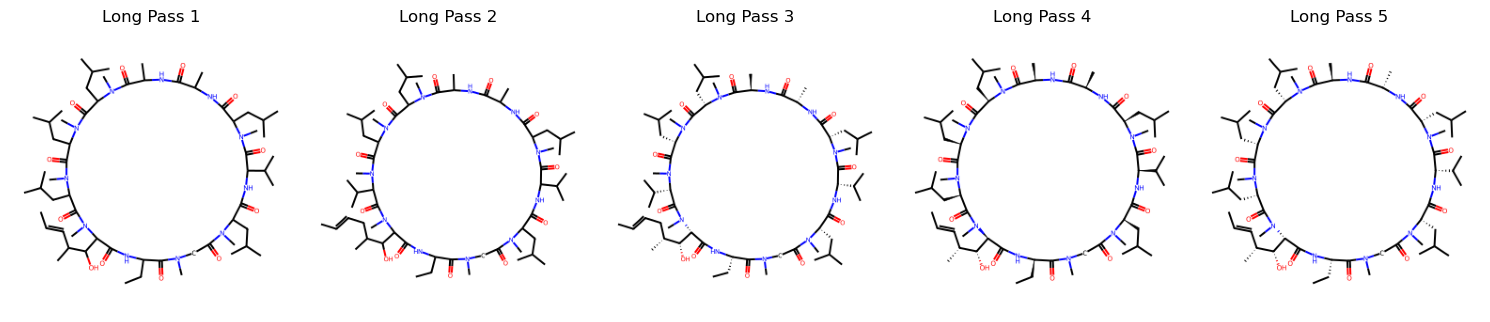

Mostrando las moléculas más pequeñas que pasan:


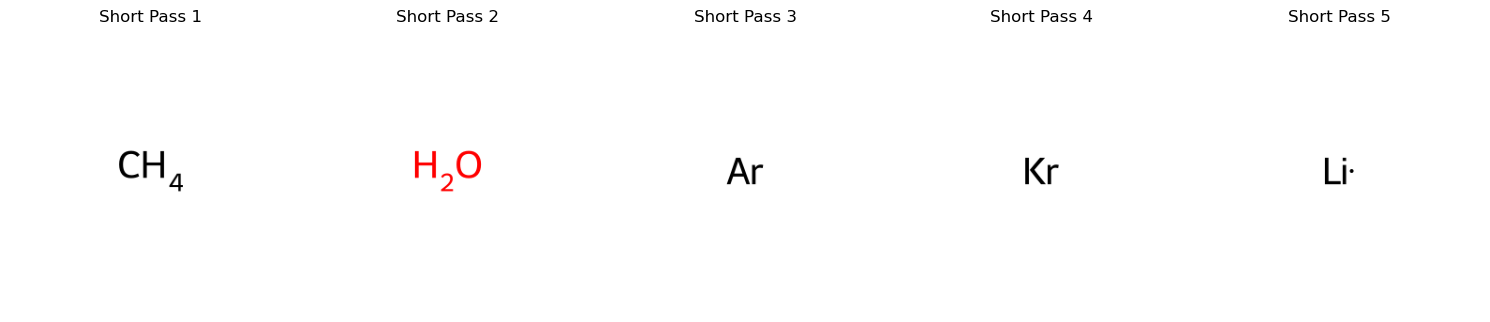

Mostrando las moléculas más largas que no pasan:


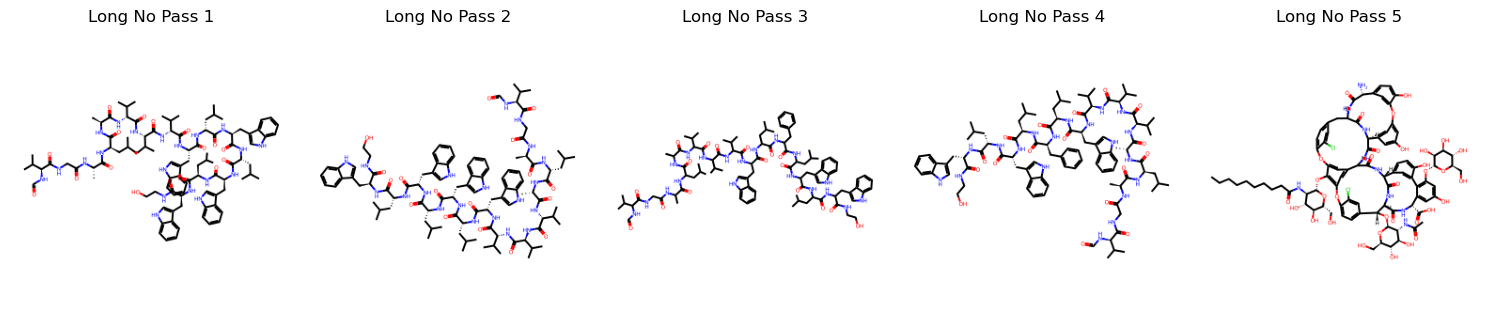

Mostrando las moléculas más pequeñas que no pasan:


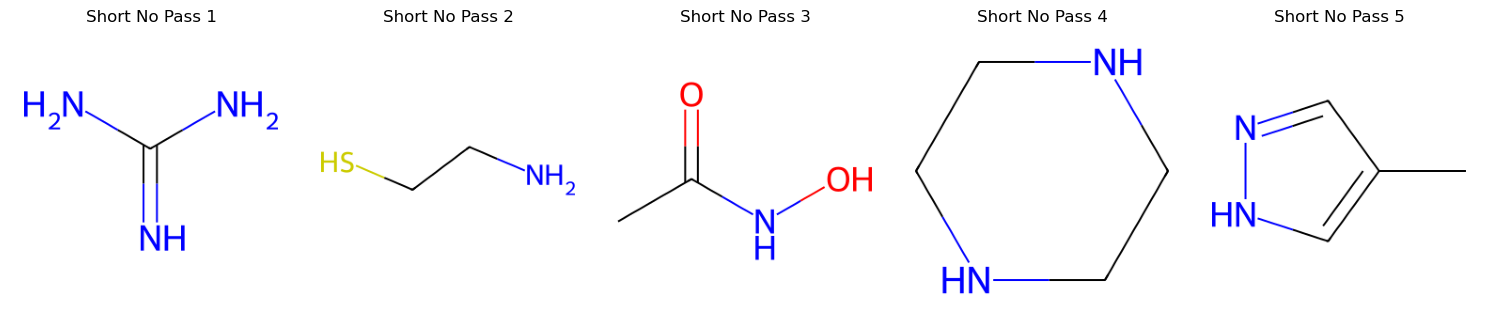

In [5]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# Función para calcular el tamaño de la molécula (número de átomos)
def molecule_size(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return mol.GetNumAtoms()
    return None

# Calcular el tamaño de cada molécula y añadirlo al DataFrame
df['Size'] = df['SMILES'].apply(molecule_size)

# Filtrar moléculas que pasan y no pasan el criterio BBB+
passing = df[df['BBB+/BBB-'] == 'BBB+']
not_passing = df[df['BBB+/BBB-'] == 'BBB-']

# Seleccionar las 5 más largas y más pequeñas
longest_passing = passing.nlargest(5, 'Size')
shortest_passing = passing.nsmallest(5, 'Size')
longest_not_passing = not_passing.nlargest(5, 'Size')
shortest_not_passing = not_passing.nsmallest(5, 'Size')

# Función para dibujar moléculas en 2D
def draw_molecules(smiles_list, titles, ncols=5):
    n = len(smiles_list)
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(n * 3, 5))
    if n == 1:  # Si solo hay una molécula, `axes` no es una lista
        axes = [axes]
    for ax, smiles, title in zip(axes, smiles_list, titles):
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            img = Draw.MolToImage(mol, size=(300, 300))
            ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Dibujar las moléculas en 2D
print("Mostrando las moléculas más largas que pasan:")
draw_molecules(longest_passing['SMILES'].tolist(), [f'Long Pass {i+1}' for i in range(5)])
print("Mostrando las moléculas más pequeñas que pasan:")
draw_molecules(shortest_passing['SMILES'].tolist(), [f'Short Pass {i+1}' for i in range(5)])
print("Mostrando las moléculas más largas que no pasan:")
draw_molecules(longest_not_passing['SMILES'].tolist(), [f'Long No Pass {i+1}' for i in range(5)])
print("Mostrando las moléculas más pequeñas que no pasan:")
draw_molecules(shortest_not_passing['SMILES'].tolist(), [f'Short No Pass {i+1}' for i in range(5)])


Mostrando las moléculas más largas que pasan:


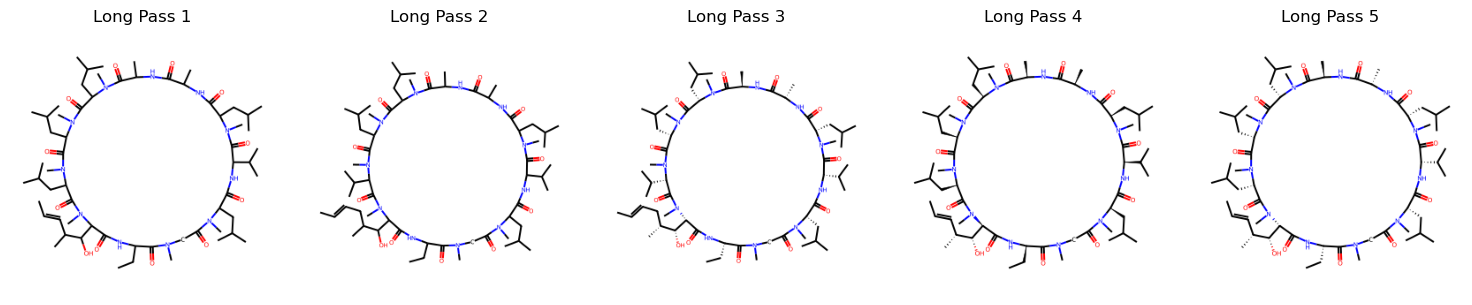

Mostrando las moléculas más pequeñas que pasan:


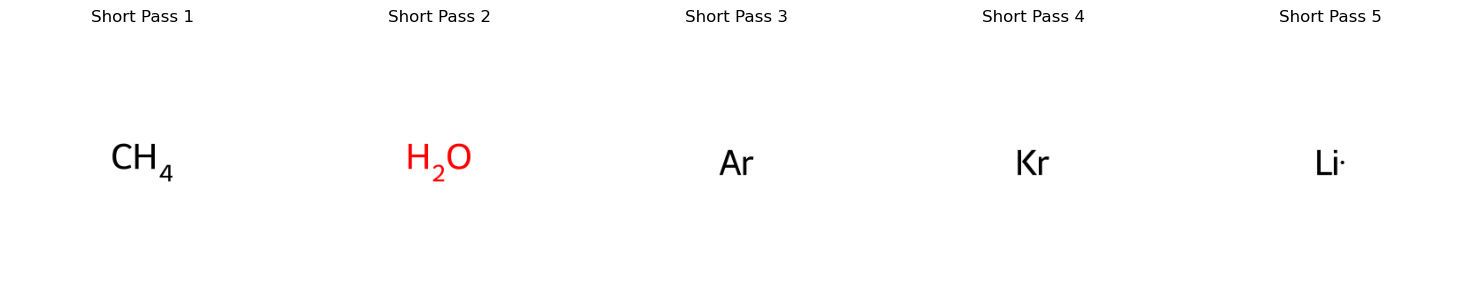

Mostrando las moléculas más largas que no pasan:


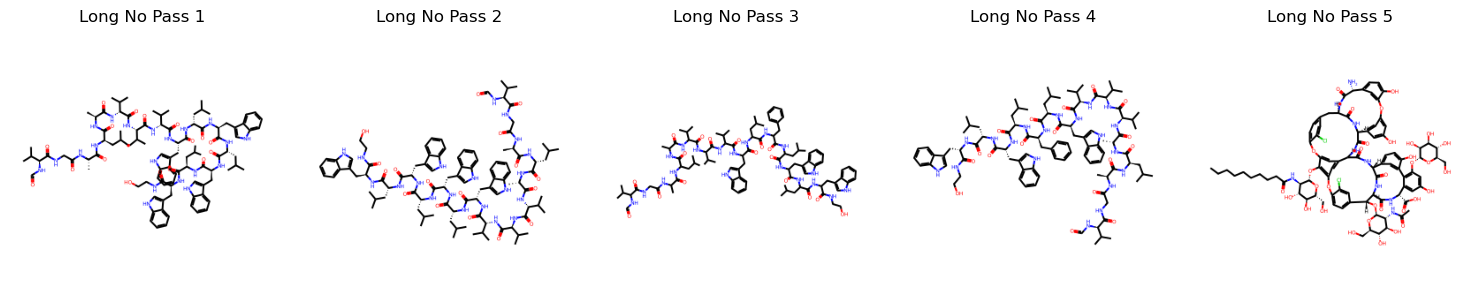

Mostrando las moléculas más pequeñas que no pasan:


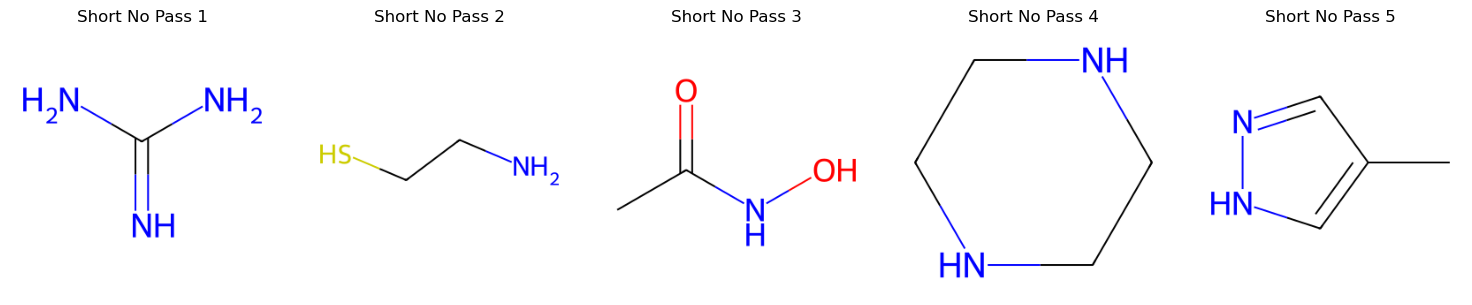

In [8]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# Función para calcular el tamaño de la molécula (número de átomos)
def molecule_size(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return mol.GetNumAtoms()
    return None

# Calcular el tamaño de cada molécula y añadirlo al DataFrame
df['Size'] = df['SMILES'].apply(molecule_size)

# Filtrar moléculas que pasan y no pasan el criterio BBB+
passing = df[df['BBB+/BBB-'] == 'BBB+']
not_passing = df[df['BBB+/BBB-'] == 'BBB-']

# Seleccionar las 5 más largas y más pequeñas
longest_passing = passing.nlargest(5, 'Size')
shortest_passing = passing.nsmallest(5, 'Size')
longest_not_passing = not_passing.nlargest(5, 'Size')
shortest_not_passing = not_passing.nsmallest(5, 'Size')

# Función para dibujar moléculas en 2D
def draw_molecules(smiles_list, titles, ncols=5):
    n = len(smiles_list)
    nrows = (n + ncols - 1) // ncols  # Calcular número de filas
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*3))
    axes = axes.flatten()  # Hacer que axes sea una lista plana

    for ax, smiles, title in zip(axes, smiles_list, titles):
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            img = Draw.MolToImage(mol, size=(300, 300))
            ax.imshow(img)
            ax.set_title(title)
        ax.axis('off')
    
    # Desactivar ejes sobrantes si hay menos moléculas
    for i in range(len(smiles_list), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Dibujar las moléculas en 2D
print("Mostrando las moléculas más largas que pasan:")
draw_molecules(longest_passing['SMILES'].tolist(), [f'Long Pass {i+1}' for i in range(5)])
print("Mostrando las moléculas más pequeñas que pasan:")
draw_molecules(shortest_passing['SMILES'].tolist(), [f'Short Pass {i+1}' for i in range(5)])
print("Mostrando las moléculas más largas que no pasan:")
draw_molecules(longest_not_passing['SMILES'].tolist(), [f'Long No Pass {i+1}' for i in range(5)])
print("Mostrando las moléculas más pequeñas que no pasan:")
draw_molecules(shortest_not_passing['SMILES'].tolist(), [f'Short No Pass {i+1}' for i in range(5)])



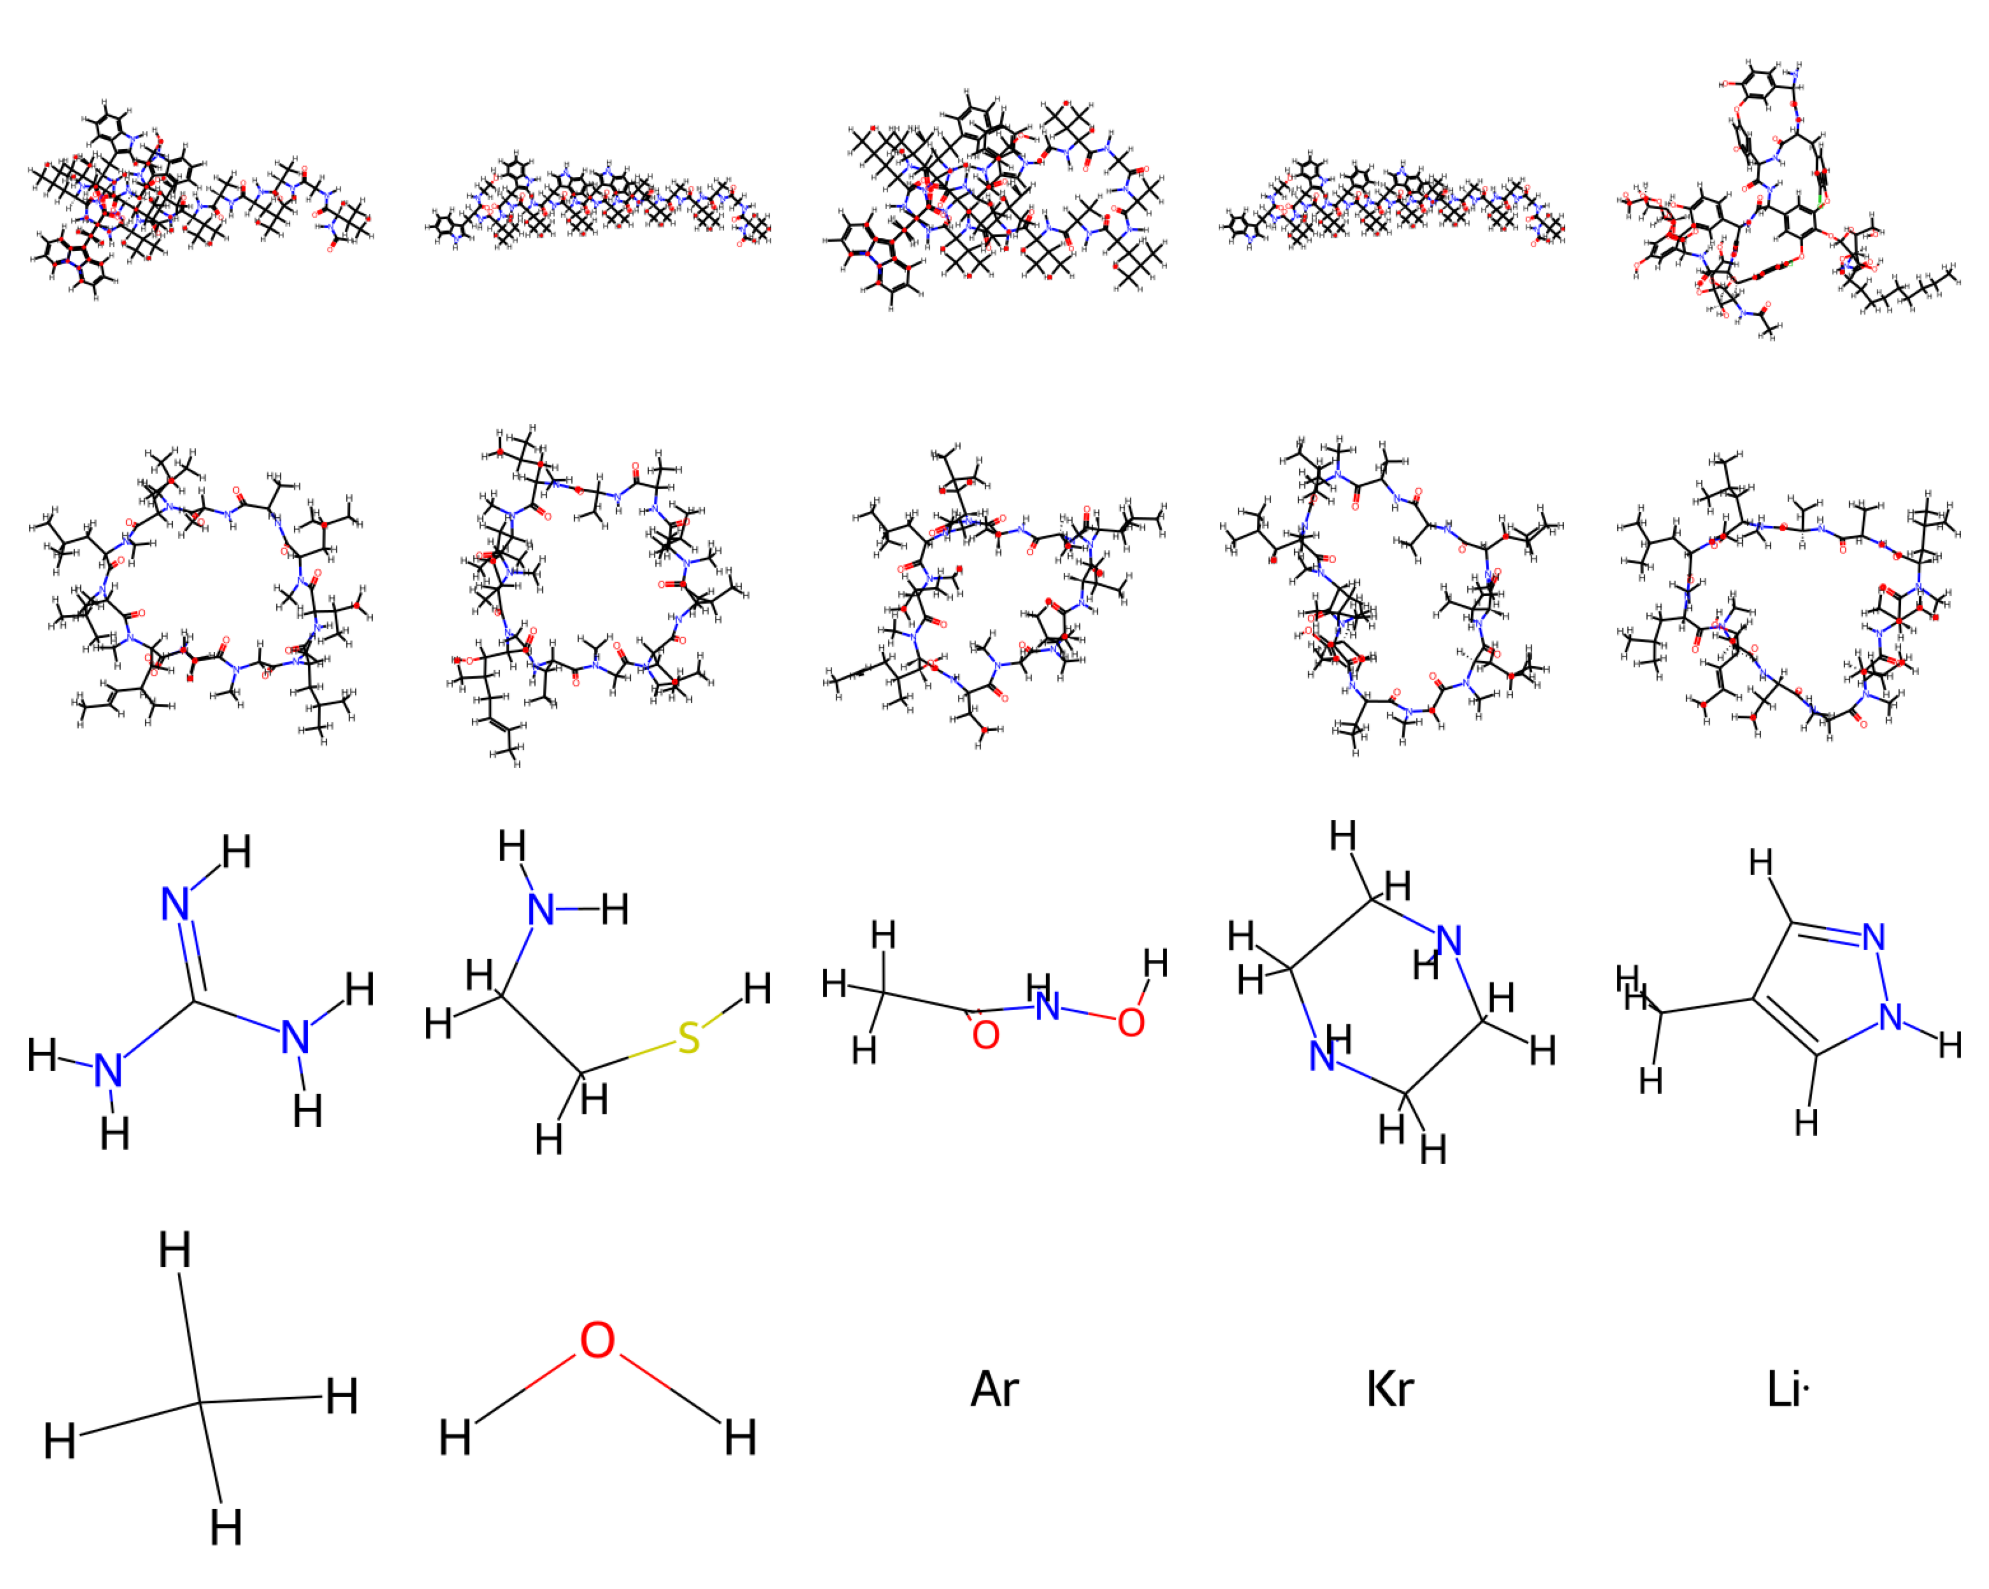

In [12]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Función para calcular el tamaño de la molécula (número de átomos)
def molecule_size(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return mol.GetNumAtoms()
    return None

# Calcular el tamaño de cada molécula y añadirlo al DataFrame
df['Size'] = df['SMILES'].apply(molecule_size)

# Filtrar moléculas que pasan y no pasan el criterio BBB+
passing = df[df['BBB+/BBB-'] == 'BBB+']
not_passing = df[df['BBB+/BBB-'] == 'BBB-']

# Seleccionar las 5 más largas y más pequeñas
longest_passing = passing.nlargest(5, 'Size')
shortest_passing = passing.nsmallest(5, 'Size')
longest_not_passing = not_passing.nlargest(5, 'Size')
shortest_not_passing = not_passing.nsmallest(5, 'Size')

# Crear una carpeta para guardar las imágenes
output_dir = 'molecule_images'
os.makedirs(output_dir, exist_ok=True)

# Función para guardar moléculas en imágenes 3D (2D renderizado)
def save_molecule_images(smiles_list, titles, file_prefix):
    for smiles, title in zip(smiles_list, titles):
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            mol = Chem.AddHs(mol)
            AllChem.EmbedMolecule(mol)  # Generar una conformación 3D
            img = Draw.MolToImage(mol, size=(300, 300))
            img_file = os.path.join(output_dir, f'{file_prefix}_{title}.png')
            img.save(img_file)
            print(f"Imagen guardada: {img_file}")


# Visualizar imágenes guardadas
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()
for i, file in enumerate(os.listdir(output_dir)):
    img = mpimg.imread(os.path.join(output_dir, file))
    axes[i].imshow(img)
    axes[i].axis('off')
plt.tight_layout()
plt.show()



In [19]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

# Función para calcular el tamaño de la molécula (número de átomos)
def molecule_size(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return mol.GetNumAtoms()
    return None

# Calcular el tamaño de cada molécula y añadirlo al DataFrame
df['Size'] = df['SMILES'].apply(molecule_size)

# Filtrar moléculas que atraviesan y no atraviesan la BBB
passing = df[df['BBB+/BBB-'] == 'BBB+']
not_passing = df[df['BBB+/BBB-'] == 'BBB-']

# Seleccionar las 5 moléculas más grandes que atraviesan la BBB
largest_passing = passing.nlargest(5, 'Size')

# Seleccionar las 5 moléculas más grandes que no atraviesan la BBB
largest_not_passing = not_passing.nlargest(5, 'Size')

# Función para convertir una molécula a formato 3Dmol
def mol_to_3Dmol(mol):
    if mol:
        mol = Chem.AddHs(mol)
        embed_result = AllChem.EmbedMolecule(mol)
        if embed_result == 0:  # Verificar si la conformación se generó correctamente
            try:
                AllChem.UFFOptimizeMolecule(mol)  # Cambiar a MMFF si es necesario
                return Chem.MolToMolBlock(mol)
            except Exception as e:
                print(f"Error al optimizar la molécula: {e}")
        else:
            print("No se pudo generar una conformación 3D para la molécula.")
    return None

# Función para mostrar moléculas en 3D
def display_molecules_3D(smiles_list, titles):
    viewer = py3Dmol.view(width=1000, height=600)
    for smiles, title in zip(smiles_list, titles):
        mol = Chem.MolFromSmiles(smiles)
        mol_block = mol_to_3Dmol(mol)
        if mol_block:
            viewer.addModel(mol_block, 'mol')
            viewer.setStyle({'stick': {}})
            viewer.setBackgroundColor('white')
            viewer.addLabel(title, {'fontSize': 16, 'backgroundColor': 'white', 'fontColor': 'black'})
            viewer.zoomTo()
    viewer.show()

# Mostrar las moléculas más grandes que atraviesan la BBB
print("Mostrando las 5 moléculas más grandes que atraviesan la BBB:")
display_molecules_3D(largest_passing['SMILES'].tolist(), [f'BBB+ Molecule {i+1}' for i in range(5)])

# Mostrar las moléculas más grandes que no atraviesan la BBB
print("Mostrando las 5 moléculas más grandes que no atraviesan la BBB:")
display_molecules_3D(largest_not_passing['SMILES'].tolist(), [f'BBB- Molecule {i+1}' for i in range(5)])

Mostrando las 5 moléculas más grandes que atraviesan la BBB:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Mostrando las 5 moléculas más grandes que no atraviesan la BBB:
No se pudo generar una conformación 3D para la molécula.
No se pudo generar una conformación 3D para la molécula.
No se pudo generar una conformación 3D para la molécula.
No se pudo generar una conformación 3D para la molécula.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [20]:
import pandas as pd
from rdkit import Chem

# Función para calcular el tamaño de la molécula (número de átomos)
def molecule_size(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return mol.GetNumAtoms()
    return None

# Calcular el tamaño de cada molécula y añadirlo al DataFrame
df['Size'] = df['SMILES'].apply(molecule_size)

# Filtrar moléculas que atraviesan y no atraviesan la BBB
passing = df[df['BBB+/BBB-'] == 'BBB+']
not_passing = df[df['BBB+/BBB-'] == 'BBB-']

# Seleccionar las 5 moléculas más grandes que atraviesan la BBB
largest_passing = passing.nlargest(5, 'Size')

# Seleccionar las 5 moléculas más grandes que no atraviesan la BBB
largest_not_passing = not_passing.nlargest(5, 'Size')

# Obtener los SMILES de las moléculas seleccionadas
largest_passing_smiles = largest_passing['SMILES'].tolist()
largest_not_passing_smiles = largest_not_passing['SMILES'].tolist()

# Imprimir los SMILES
print("SMILES de las 5 moléculas más grandes que atraviesan la BBB:")
for smiles in largest_passing_smiles:
    print(smiles)

print("\nSMILES de las 5 moléculas más grandes que no atraviesan la BBB:")
for smiles in largest_not_passing_smiles:
    print(smiles)

SMILES de las 5 moléculas más grandes que atraviesan la BBB:
C/C=C/C(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N1C
C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C
C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC)C(=O)N(C)CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](C(C)C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](C)C(=O)N[C@H](C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N(C)[C@@H](C(C)C)C(=O)N1C
C/C=C/[C@@H](C)[C@@H](O)[C@@H]1C(=O)N[C@H](CC)C(=O)N(C)CC(=O)N(C)[C@H](CC(C)C)C(=O)N[C@H](C(C)C)C(=O)N(C)[C@H](CC(C)C)C(=O)N[C@H](C)C(=O)N[C@H](C)C(=O)N(C)[C@H](CC(C)C)C(=O)N(C)[C@H](CC(C)C)C(=O)N(C)[C@H](CC(C)C)C(=O)N1C
C/C=C/[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC)C(=O)N(C)CC(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](C(C)C)C(=O)N(C)[C@@H](CC(C)C)C(=O)N[C@@H](C)C(=O)N[C@H](C)